# Machine Learning on the Iris dataset

## Introduction

* In this machine learning example we classify flowers in the Iris data set based on 4 attributes given for each flower.  
  
  
* The Iris classification problem is the "Hello World" of machine learning. The Iris dataset is widely available from many online sources. You can learn more about this dataset on Wikipedia. 
  
  
* Three classes of Iris are represented in the dataset, therefore, this is a multi-class classification problem (also called "multi-nominal").  
  
  
* The Iris dataset is small and easily fits into memory, with just 4 attribute measurements for each of 150 iris flowers.  


## Structure of the Iris dataset
  
* The structure of the dataset is 150 rows and 5 columns. One row for each flower. There are four columns with measurements of various attributes of each flower in centimeters. The fifth column tells us the species of each flower. All observed flowers belong to one of three species.  

## Training and Validation set

* The dataset will be split into a training set and a validation set.  
  
   
* We will use the training set to train several models to classify each flower as one of the three Iris species based on the four measurements: sepal and petal lenght and width. The models train by checking against the provided correct species labels in the fifth column.  
  
  
* The best model will then be run on the validation set, the model output will be compared to the correct species labels to give us an independent final check on the accuracy of the best model.  
  
  
* The trained model can then be used on unlabeled cases, that is, where we have flower attribute measuremens but we don't know the species of each flower.

In [58]:
# These are some display settings for our Jupyter notebook
# modifying the ast_note_interactivity kernel option to make
# jupyter pretty-print any variable or statement on it’s own line, so you can see the value of multiple statements at once.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# So that plots are displayed inline, "plt.show()" not needed.
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['ylim', 'xlim', 'legend', 'colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [59]:
#One time installations you may need to do

# Update sklearn to prevent model_selection error
# Run bash command on the terminal:
# "pip install -U scikit-learn"
# or 
# "conda update scikit-learn"
# Then re-start Jupyter notebook

In [60]:
# Load needed libraries and print their versions 
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy as sp
print('scipy: {}'.format(sp.__version__))
# numpy
import numpy as np
print('numpy: {}'.format(np.__version__))
# matplotlib
import matplotlib as mpl
print('matplotlib: {}'.format(mpl.__version__))
# pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
# scikit-learn
import sklearn as skl
print('sklearn: {}'.format(skl.__version__))
#  pyplot
#import matplotlib.pyplot as plt

Python: 3.5.2 (default, Nov 17 2016, 17:05:23) 
[GCC 5.4.0 20160609]
scipy: 0.19.1
numpy: 1.13.0
matplotlib: 1.5.1
pandas: 0.20.2
sklearn: 0.18.2


In [61]:
# Load some individual functions
from pandas.tools.plotting import scatter_matrix


## Loading the data

This dataset is available from sklearn and it can also be downloaded from many online sources, as shown below.



In [62]:
# Load the Iris dataset

# import iris from sklearn datasets
# from sklearn import datasets
# dataset = datasets.load_iris()

# import iris from a csv file given its url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

# See the files in the current directory using bash commands
print("files in current directory:")
! ls

files in current directory:
Iris_ML.ipynb  labeledTrainData.tsv		 Untitled.ipynb
iris.pdf       Sample_Notebook_Formatting.ipynb


## Exploring the data

In this step we are going to take a look at the data a few different ways:

* Dimensions of the dataset 

* Peek at the first 10 rows 

* Statistical summary of all attributes  

* Breakdown of the data by the class variable

How many records are there for each class of flower?

In [63]:
# shape
print('Shape'+'\n', dataset.shape)
# (150, 5)

# head
print('Head'+'\n', dataset.head(10))

# description
print('Describe'+'\n', dataset.describe())

# data by class variable
print('Data by class')
print('groupby(\'class\').size()'+'\n',dataset.groupby('class').size())

Shape
 (150, 5)
Head
    sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa
Describe
        sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433

## Visualization for exploratory analysis

Below are plotting examples using either matplotlib or ggplot.  
  
  
### Visualization using matplotlib  

From the [docs](https://matplotlib.org/users/intro.html): "Matplotlib is designed with the philosophy that you should be able to create simple plots with just a few commands, or just one! If you want to see a histogram of your data, you shouldn’t need to instantiate objects, call methods, set properties, and so on; it should just work."

The option to use ggplot style with matplotlib is available by entering the command: "matplotlib.style.use('ggplot')"


### Visualization using ggplot2

ggplot is a Python package with plotting functions that were modeled after the R language package ggplot2. Be sure to specify "python ggplot" in your searches and to not confuse ggplot2 examples as ggplot.
  
    
ggplot is based on the *grammar of graphics*, which separates a graphic into different layers. Each layer acts like a transparency sheet. Each contains an element of the graphic, and the layers can be combined in different ways. [Read more](https://codewords.recurse.com/issues/six/telling-stories-with-data-using-the-grammar-of-graphics), and [more](http://blog.yhat.com/posts/ggplot-0.4-released.html).


## Univariate Plots  

* We start with some univariate plots, that is, plots of individual variables (attributes).  
  
  
* Because the input variables are numeric, we can create box and whisker plots of each.  
  
  
    - The top and bottom edges of the box show the 1st and 3rd quartile (left and right medians of the median), the inside line is the median. That is, the center 50% of the data lies inside the box. The whiskers extend to the min and max values in the data.  
    
1. The box and whisker plots show the range of values of each input variables.  
    
2. The histograms shows us the distribution of values of each input variable. One thing to check for is whether the distributions look Gaussian and if they're skewed.

3. These scatterplots show us how petal width varies as petal length increases. We can check for qualitative and quantitative differences in this relationship among the different classes.

4. These faceted scatterplots show us the distribution for each attribute broken down by class.

sepal-length       Axes(0.125,0.547727;0.352273x0.352273)
sepal-width     Axes(0.547727,0.547727;0.352273x0.352273)
petal-length          Axes(0.125,0.125;0.352273x0.352273)
petal-width        Axes(0.547727,0.125;0.352273x0.352273)
dtype: object

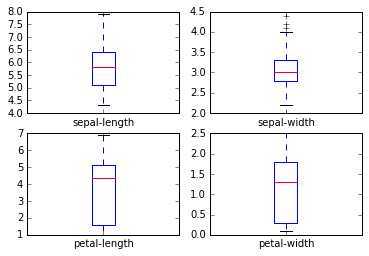

In [64]:
# box and whisker plots, using matplotlib
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
# We use the ".plot" method on a DataFrame. ".plot" is just a simple wrapper around plt.plot()

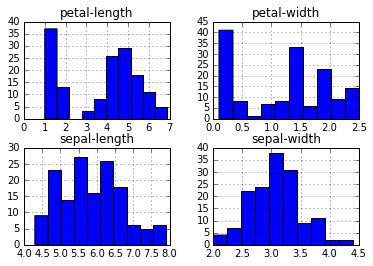

In [65]:
# Histograms to see if any of the input variables have a Gaussian distribution. 
# This is useful to note as we can use algorithms that can exploit this assumption.
# .hist method is a wrapper of plt.hist
dataset.hist();

In [70]:
import builtins

from ggplot.geoms.geom import geom
import ggplot.stats.smoothers
from ggplot.utils import is_date

class stat_smooth(geom):
#... changed just line 77 as per solution #1

 # Overwriting the stat_smooth file inside ggplot package in the local env.
    builtins.stat_smooth = stat_smooth

ggplot: 0.11.5


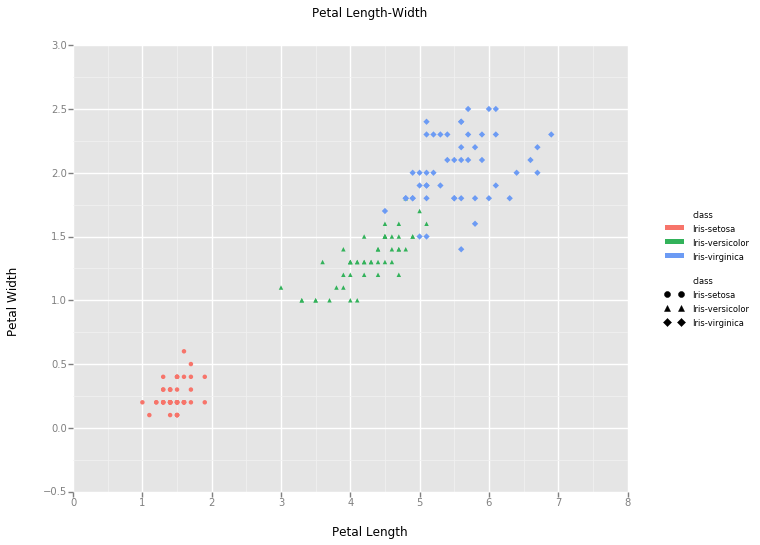

<ggplot: (8786954634332)>

In [75]:
# Scatterplots, using ggplot
# bash command "pip install ggplot" may be needed first.
from ggplot import *
# ggplot
import ggplot as ggp
print('ggplot: {}'.format(ggp.__version__))
import warnings
# Suppress an inconcequential warning related to stat_smooth
warnings.simplefilter(action='ignore', category=FutureWarning)

# Scatter plot using ggplot
g = ggplot(aes(x = "petal-length", y = "petal-width", color="class", shape="class"), \
           data=dataset)

g + geom_point() +\
    xlab("Petal Length") +\
    ylab("Petal Width") +\
    ggtitle("Petal Length-Width") #+stat_smooth(method="lm")
    #stat_smooth(method="lm") may give error for pandas version 0.17 (or possibly v. 0.19) and higher
    #stat_smooth produces a smoothed trend line with shaded confidence interval

## Faceting

Producing multiple charts as one plot.

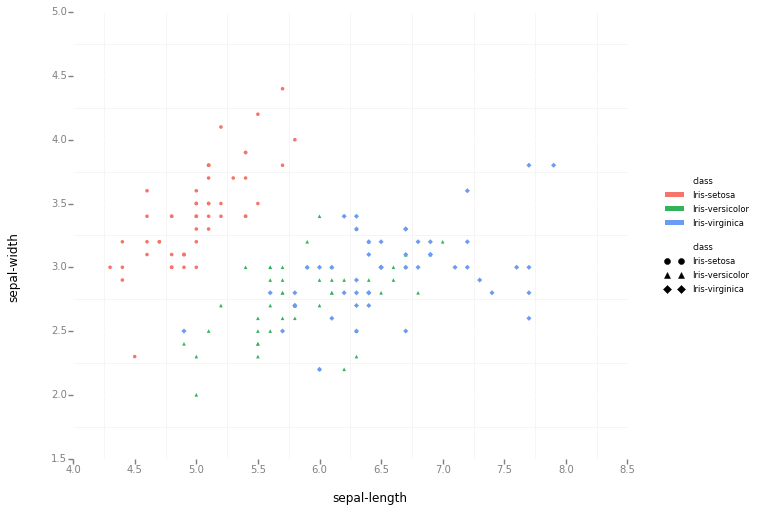

<ggplot: (8786997498060)>


In [76]:
myfacet = ggplot(aes(x="sepal-length", y="sepal-width", color="class", shape="class"), data=dataset) +\
geom_point(size=13) #+stat_smooth(method="lm")+\ #may give "sort" error
xlab("Sepal Length") +\
ylab("Sepal Width") +\
ggtitle("Faceted Graphs") +\
theme_bw() +\
facet_grid("class") # One class per row
    
print(myfacet)

## Multivariate Plots  


Now we can look at the interactions between the variables.

First let’s look at scatterplots of all pairs of attributes. 
This can be helpful to spot structured relationships between input variables.

Note the diagonal grouping of some pairs of attributes. This suggests a high correlation and a predictable relationship.

Direction (Positive/Negative)
Form (Linear/Nonlinear)
Strength (No association/Weak/Moderate/Strong/Perfect)
Outliers

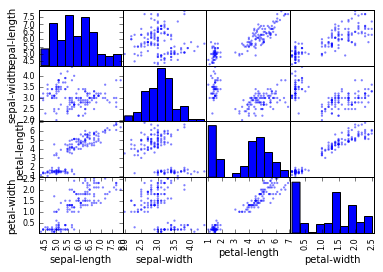

In [77]:
# scatter plot matrix, from package pandas.tools.plotting
scatter_matrix(dataset);

## Training Machine Learning models

Let's try to classify the flowers using the 9 supervised ML algorithms: 

1. Decision Trees (DT)
1. Random Forest (RM)
1. Gradient Boosting (GB)
1. Logistic Regression (LR)
2. Linear Discriminant Analysis (LDA)
3. K-Nearest Neighbors (KNN)
4. Classification and Regression Trees (CART)
5. Gaussian Naive Bayes (NB)
6. Support Vector Machines (SVM)


## Stand-alone models

To begin, I will implement the first three machine learning algorithms one at a time.

After that, I will present a more detailed procedure to build and compare models 4-10. We will create a for-loop that can quickly build 6 models and produce statistics to compare them. In this section, we will demonstrate how to subset the data into a training and a validation set and to perform 10-fold cross-validation test harness. 

## Let's try the first 3 models using scikit-learn:

7. Decision Trees (DT)
8. Random Forest (RM)
9. Gradient Boosting (GB)

# Decision Trees  

Based on the example on the scikit-learn documentation. Read [more](http://scikit-learn.org/stable/modules/ensemble.html).

In [78]:
# Here we do a stand-alone Decision Tree classification 
# to produce a tree graph
# Starting with the scikit-learn decision tree model (scikit-learn package is called sklearn)
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
# This loads the data as a "Bunch" object, a dictionary-like object, 
# the interesting attributes are: ‘data’, the data to learn, ‘target’, the classification labels, ‘target_names’, the meaning of the labels, ‘feature_names’, the meaning of the features, and ‘DESCR’, the full description of the dataset.
print(type(iris))
print(len(iris))
list(iris.target_names)

<class 'sklearn.datasets.base.Bunch'>
5


['setosa', 'versicolor', 'virginica']

In [79]:
clf = tree.DecisionTreeClassifier()
# Train the model
clf = clf.fit(iris.data, iris.target)

## Let's graph the tree  

Once trained, we can export the tree in Graphviz format using the export_graphviz exporter. Below is an example export of a tree trained on the entire iris dataset.

The export_graphviz exporter also supports a variety of aesthetic options, including coloring nodes by their class (or value for regression) and using explicit variable and class names if desired. IPython notebooks can also render these plots inline using the Image() function.

In [80]:
# On command line, conda install graphviz
# You may need to re-start your Jupyter notebooks session after installing so that the library will get imported.
import graphviz

with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

ImportError: No module named 'graphviz'

In [81]:
# From the command line, pip install pydotplus
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("iris.pdf") 

True

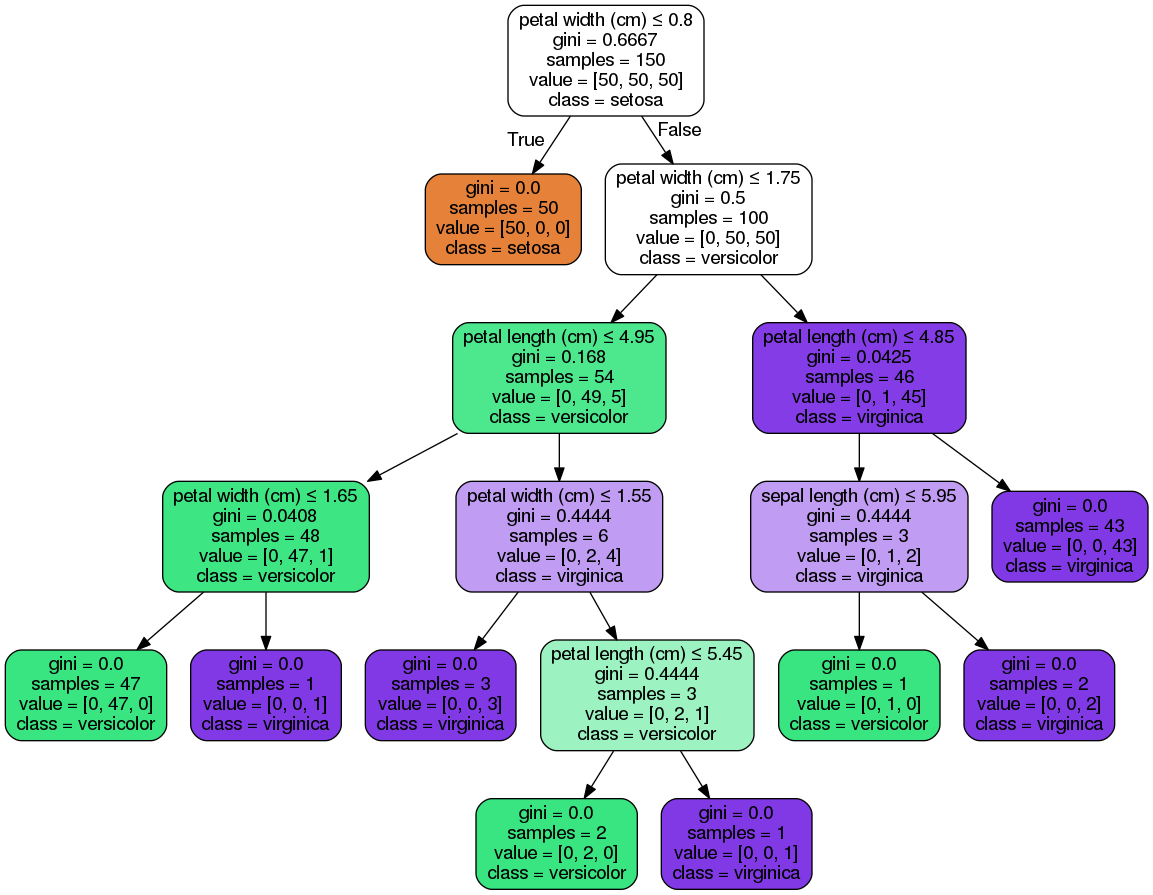

In [82]:
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

In [83]:
# After being fitted, the model can then be used to predict the class of samples:
flower0 = iris.data[0:1, :] # all features of the 0th datum
flower52 = iris.data[52:53, :]
print(*iris.feature_names, sep='\n')
print("flower0",flower0)
clf.predict(flower0)
clf.predict(flower52)


# Alternatively, the probability of each class can be predicted, 
# which is the fraction of training samples of the same class in a leaf:
print("probability that flower0 belongs to each of the 3 classes")
clf.predict_proba(iris.data[:1, :])

sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)
flower0 [[ 5.1  3.5  1.4  0.2]]


array([0])

array([1])

probability that flower0 belongs to each of the 3 classes


array([[ 1.,  0.,  0.]])

## Random Forest

Here is a stand-alone implementation of the scikit-learn Random Forest algorithm. Read [more](http://blog.yhat.com/posts/random-forests-in-python.html).

In [84]:
from sklearn.ensemble import RandomForestClassifier

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),is_train,species
0,5.1,3.5,1.4,0.2,True,setosa
1,4.9,3.0,1.4,0.2,True,setosa
2,4.7,3.2,1.3,0.2,True,setosa
3,4.6,3.1,1.5,0.2,False,setosa
4,5.0,3.6,1.4,0.2,True,setosa


In [85]:
train, test = df[df['is_train']==True], df[df['is_train']==False]

features = df.columns[:4]
clf = RandomForestClassifier(n_jobs=2)
y, _ = pd.factorize(train['species'])
clf.fit(train[features], y)

preds = iris.target_names[clf.predict(test[features])]
pd.crosstab(test['species'], preds, rownames=['actual'], colnames=['preds'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

preds,setosa,versicolor,virginica
actual,,,
setosa,6,0,0
versicolor,0,10,2
virginica,0,1,9


## Gradient Boosting

Read more [here](https://mancap314.github.io/gradient-boosting.html)

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_iris

# Define the predictor variables
predictors = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]

irisBunch = load_iris()
irisDf = pd.DataFrame(irisBunch.data, columns=predictors)
irisDf["Species"] = irisBunch.target #adding column for species
irisDf.head()
print(type(irisDf))
print(irisDf.columns)


#random_state fixed for reproducibility, 3 trees with max. depth=3
alg = GradientBoostingClassifier(random_state=1, n_estimators=3, max_depth=3)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<class 'pandas.core.frame.DataFrame'>
Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')


In [87]:
#make algorithm fit on selected train slice
alg.fit(irisDf[predictors], irisDf["Species"])
#apply on the test slice
predictions = alg.predict(irisDf[predictors])

# Calculate the accuracy of the predictions
number_misclassifications = len(predictions[predictions != np.array(irisDf["Species"])])
print(number_misclassifications)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=3, presort='auto', random_state=1,
              subsample=1.0, verbose=0, warm_start=False)

1


## Models 4-10 with 10-fold cross-validation

We will train some models and compare their accuracies. The steps will be:

- Separate out a validation dataset  
- Set-up the test harness to use 10-fold cross validation 
- Build 6 different models to predict species from flower measurements  
    * Logistic Regression (LR)
    * Linear Discriminant Analysis (LDA)
    * K-Nearest Neighbors (KNN)
    * Classification and Regression Trees (CART)
    * Gaussian Naive Bayes (NB)
    * Support Vector Machines (SVM)
- Select the best model 

## Create a Training and Validation datasets 

We start by separating our 150 labeled cases into a random sample of 80% of the cases. This will make up the training set, which we use to train each of our models. Training our model means that we feed the model the data with all the correct flower species labels so that the model can pick up on trends that are indicative of flower species.

When we train a model, we usually get back measures of its accuracy. These accuracy measures will be useful to us but they cannot be trusted as validation of our model. Validation should come from previously unseen data.

For that reason, we reserve the remaining 20% to use as our validation set, which we will run through our trained models to get measures of how well each model performs on previously-unseen data.

Validating our models using the same data on which the model was trained is not be reasonable because the model could have picked up wrong or false trends particular to the cases that it trained on. The model could have high accuracy on this data even though if it's actually a defective model. A common problem with trained models where the model has so many ways of adjusting to match the training data, that the model adjusts to random variations in the data. This is called "**overfitting**," and it is a serious threat with every model we train. For these reasons, it is imperative to always use unseen data to validate our models. 

If a model performs much worse on unseen data than with the training data, it is highly likely that you've become the newest victim of overfitting.

Machine learning packages generally come with functions that perform statistical analysis to estimate the accuracy of the models.

An 80% / 20% is pretty standard but in cases where there is very little data available, it may be advisable to use more than 80% of the data to train, and, consequently, have a smaller and less reliable validation set. 

### Setting a random seed

Whenever we generate random numbers or randomly split up a subset, we risk getting different results each time we run our code. Setting a seed number makes our code generate the same random number or random split each time. When we can repeat a procedure and get exact or near-exact results, we say our procedure is **repeatable**.

In [88]:
# Loading scikit-learn model functions
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [89]:
# Split-out train and validation (or test) data subsets
array = dataset.values
X = array[:,0:4]
Y = array[:,4] # col 4 is petal width
validation_size = 0.20
seed = 7 # setting the seed allows us to have repeatable results
X_train, X_validation, Y_train, Y_validation = \
model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

## Test Harness
We will use 10-fold cross validation to estimate accuracy.

This will split our dataset into 10 parts (n_splits=10, in model.selection). It will take one of the parts as the test set and train on the remaining 9 parts. This procedure will be repeated 9 more times, each time using a different part as the test set.

In [90]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

### Measuring accuracy
We are using the metric of ‘accuracy‘ to evaluate models. This is a ratio of the number of correctly predicted instances in divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the scoring variable when we run build and evaluate each model next.

## Building Models
We don’t know which algorithms would be good on this problem or what configurations to use. We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

Let’s first evaluate 6 different algorithms:

1. Logistic Regression (LR)
2. Linear Discriminant Analysis (LDA)
3. K-Nearest Neighbors (KNN).
4. Classification and Regression Trees (CART).
5. Gaussian Naive Bayes (NB).
6. Support Vector Machines (SVM).  


This is a good mixture of simple linear (LR and LDA) and nonlinear (KNN, CART, NB and SVM) algorithms. We reset the random number seed before each run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. It ensures the results from different models are directly comparable.

Let’s build and evaluate our five models:

In [91]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.966667 (0.040825)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


## Selecting the best model
We now have 6 models and accuracy estimations for each. We need to compare the models to each other and select the most accurate.

We can see above that it looks like KNN has the largest estimated accuracy score.

We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (10 fold cross validation).

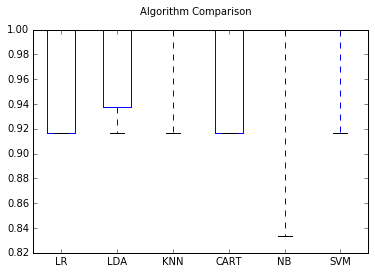

In [92]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)

ax.set_xticklabels(names); #outputs useless text

You can see that the box and whisker plots are squashed at the top of the range, with many samples achieving 100% accuracy.

## Making Predictions

The KNN algorithm was the most accurate model that we tested. Now we want to get an idea of the accuracy of the model on our validation set.

This will give us an independent final check on the accuracy of the best model. It is valuable to keep a validationto test for general mistakes, overfitting, and data leak. Overfitting and data leak will both result in an overly optimistic result.

We can run the KNN model directly on the validation set and summarize the results as a final accuracy score, a confusion matrix and a classification report.

In [93]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



The f1-score gives you the harmonic mean of precision and recall. The scores corresponding to every class will tell you the accuracy of the classifier in classifying the data points in that particular class compared to all other classes.

The support is the number of samples of the true response that lie in that class.

Support - http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html

F1-score - http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

We can see that the accuracy is 0.9 or 90%. 

The confusion matrix provides an indication of the three errors made. Learn more about the [confusion matrix] (en.wikipedia.org/wiki/Confusion_matrix)

[[ 7  0  0]  # 7 class 0 were predicted correctly
 [ 0 11  1]  # 1 class 1 was misclassified as class 2
 [ 0  2  9]] # 2 class 2 were misclassified as class 1
 
Where:    
class 0: Iris-setosa       
class 1: Iris-versicolor 
class 2: Iris-virginica

Finally the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results (granted the validation dataset was small).